## 1. Meet Dr. Ignaz Semmelweis

In [156]:
# Importing modules
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Print out yearly
# ... YOUR CODE FOR TASK 1 ...
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


## 2. The alarming number of deaths

In [158]:
# Calculate proportion of deaths per no. births
# ... YOUR CODE FOR TASK 2 ...
yearly['proportion_deaths']=yearly['deaths'] / yearly['births']

# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly['clinic']=='clinic 1']
clinic_2 = yearly[yearly['clinic']=='clinic 2']

# Print out clinic_1
# ... YOUR CODE FOR TASK 2 ...
print(clinic_1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


## 3. Death at the clinics

<AxesSubplot:xlabel='year', ylabel='Proportion deaths'>

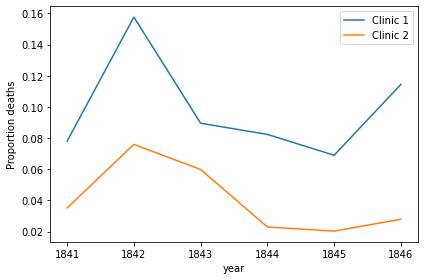

In [160]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
# ... YOUR CODE FOR TASK 3 ...
ax=clinic_1.plot(x="year", y="proportion_deaths", label="Clinic 1")
clinic_2.plot(x="year", y="proportion_deaths", label="Clinic 2", ax=ax, ylabel="Proportion deaths")

## 4. The handwashing begins

In [162]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=["date"])

# Calculate proportion of deaths per no. births
# ... YOUR CODE FOR TASK 4 ...
monthly['proportion_deaths']=monthly.deaths/monthly.births


# Print out the first rows in monthly
# ... YOUR CODE FOR TASK 4 ...
print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


## 5. The effect of handwashing

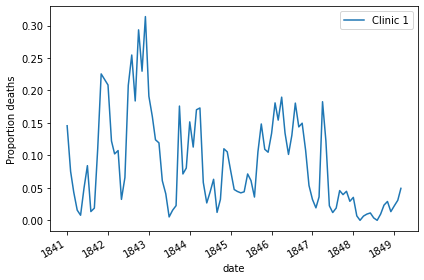

In [164]:
# Plot monthly proportion of deaths
# ... YOUR CODE FOR TASK 5 ...
ax=monthly.plot(x='date', y='proportion_deaths', label='Clinic 1', ylabel='Proportion deaths')



## 6. The effect of handwashing highlighted

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

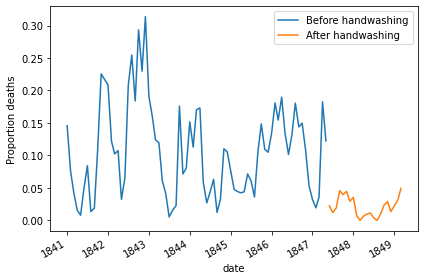

In [166]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date']<handwashing_start]
after_washing = monthly[monthly['date']>=handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
# ... YOUR CODE FOR TASK 6 ...
ax=before_washing.plot(x='date', y='proportion_deaths', label='Before handwashing')
after_washing.plot(x='date', y='proportion_deaths', ylabel='Proportion deaths', ax=ax, label='After handwashing')

## 7. More handwashing, fewer deaths?

In [168]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean()-before_proportion.mean()
mean_diff

-0.08395660751183336

## 8. A Bootstrap analysis of Semmelweis handwashing data

In [170]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean()-boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101780
0.975   -0.067432
dtype: float64

## 9. The fate of Dr. Semmelweis

In [172]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True